![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



## Проект подготовлен Дарьей Фесенко 

# import

### Импорт необходимых библиотек и модулей

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import pandas as pd
from collections import Counter
import numpy as np # linear algebra
import re
from re import findall
import datetime
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import gensim
import os
from gensim.utils import simple_preprocess
from gensim import corpora
sw = stopwords.words('english')
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
import pandas_profiling
from pandas_profiling import ProfileReport


import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import cufflinks as cf
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import seaborn as sns 
%matplotlib inline

init_notebook_mode(connected=True)
cf.go_offline()

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor 
from sklearn import metrics

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder

import math
import copy
from IPython.display import display
pd.options.mode.chained_assignment = None
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
from IPython.display import display
pd.set_option('display.max_columns', 200)  # показывать больше колонок
RANDOM_SEED = 581321
!pip freeze > requirements.txt
# Any results you write to the current directory are saved as output.
CURRENT_DATE = pd.to_datetime('01/10/2021')

[nltk_data] Downloading package stopwords to /home/dafe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/dafe/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# DATA

In [2]:
df_train = pd.read_csv('main_task.csv')
df_test = pd.read_csv('kaggle_task.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [3]:
display(df_train.head(2))
display(df_test.head(2))
display(sample_submission.head(2))

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032


,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944


,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5


In [4]:
display(df_train.info())
display(df_test.info())
display(sample_submission.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      10000 non-null  object 
 1   City               10000 non-null  object 
 2   Cuisine Style      7693 non-null   object 
 3   Ranking            10000 non-null  float64
 4   Price Range        6525 non-null   object 
 5   Number of Reviews  9343 non-null   float64
 6   Reviews            9998 non-null   object 
 7   URL_TA             10000 non-null  object 
 8   ID_TA              10000 non-null  object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant_id  10000 non-null  object 
 1   Rating         10000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


None

In [5]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем
data.columns = [column.replace(' ','_') for column in data.columns]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine_Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price_Range        32639 non-null  object 
 5   Number_of_Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [7]:
data.sample(3)

,Restaurant_id,City,Cuisine_Style,Ranking,Price_Range,Number_of_Reviews,Reviews,URL_TA,ID_TA,sample,Rating
16581,id_2461,Lisbon,['Chinese'],2464.0,$$ - $$$,29.0,"[['Very good Chinese food in Lisbon', 'Decent ...",/Restaurant_Review-g189158-d1064563-Reviews-Tu...,d1064563,1,3.5
11884,id_950,Stockholm,"['Japanese', 'Sushi', 'Asian', 'Grill']",951.0,$$ - $$$,27.0,"[['Fresh and tasty Japanese/Asian food', 'Good...",/Restaurant_Review-g189852-d758368-Reviews-Sak...,d758368,1,4.0
9464,id_9464,Paris,"['Italian', 'European', 'Vegetarian Friendly']",3524.0,$$ - $$$,156.0,"[['GREAT PIZZA', 'Very good and nice atmospher...",/Restaurant_Review-g187147-d813031-Reviews-Le_...,d813031,0,0.0


In [8]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Cleaning and Prepping Data


# 0   Restaurant_id 

In [9]:
df= data.copy()
df.Restaurant_id.value_counts()

id_633      19
id_871      19
id_436      19
id_227      19
id_430      18
            ..
id_11952     1
id_13129     1
id_10542     1
id_11371     1
id_9172      1
Name: Restaurant_id, Length: 13094, dtype: int64

Как видим, многие повторяются, видимо, есть сетевые магазины

In [10]:
count_franchise = df['Restaurant_id'].value_counts()
df['count_franchise'] = df['Restaurant_id'].apply(lambda x: count_franchise[x])
df['count_franchise'].describe()

count    50000.000000
mean         6.809000
std          4.249965
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         19.000000
Name: count_franchise, dtype: float64

# 1   City

In [11]:
le = LabelEncoder()
le.fit(df['City'])
df['code_City'] = le.transform(df['City'])

count_rest_in_city = df['City'].value_counts()
df['count_rest_in_city'] = df['City'].apply(lambda x: count_rest_in_city[x])
df['count_rest_in_city'].describe()

count    50000.000000
mean      3196.634400
std       2321.787321
min        222.000000
25%       1145.000000
50%       2694.000000
75%       6108.000000
max       7193.000000
Name: count_rest_in_city, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, 'Paris'),
  Text(1, 0, 'Stockholm'),
  Text(2, 0, 'London'),
  Text(3, 0, 'Berlin'),
  Text(4, 0, 'Munich'),
  Text(5, 0, 'Oporto'),
  Text(6, 0, 'Milan'),
  Text(7, 0, 'Bratislava'),
  Text(8, 0, 'Vienna'),
  Text(9, 0, 'Rome'),
  Text(10, 0, 'Barcelona'),
  Text(11, 0, 'Madrid'),
  Text(12, 0, 'Dublin'),
  Text(13, 0, 'Brussels'),
  Text(14, 0, 'Zurich'),
  Text(15, 0, 'Warsaw'),
  Text(16, 0, 'Budapest'),
  Text(17, 0, 'Copenhagen'),
  Text(18, 0, 'Amsterdam'),
  Text(19, 0, 'Lyon'),
  Text(20, 0, 'Hamburg'),
  Text(21, 0, 'Lisbon'),
  Text(22, 0, 'Prague'),
  Text(23, 0, 'Oslo'),
  Text(24, 0, 'Helsinki'),
  Text(25, 0, 'Edinburgh'),
  Text(26, 0, 'Geneva'),
  Text(27, 0, 'Ljubljana'),
  Text(28, 0, 'Athens'),
  Text(29, 0, 'Luxembourg'),
  Text(30, 0, 'Krakow')])

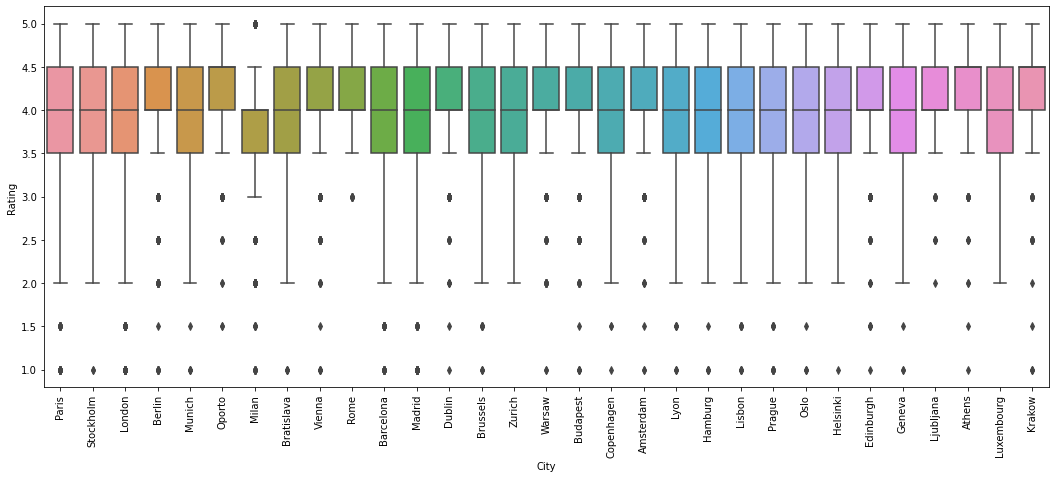

In [12]:
plt.figure(figsize=(18,7))
sns.boxplot(x='City', y='Rating', data=df[df['sample']==1])
plt.xticks(rotation=90)

Добавим признак с населением, тыс. человек. Данные из Википедии

In [13]:
city_dict = {'Paris': 2148.327, 'Helsinki':656.611, 'Edinburgh':488.1, 'London':8961.989, 'Bratislava':437.725, 
             'Lisbon':505.526,'Budapest':1752.286, 'Stockholm':961.609, 'Rome':2870.500, 'Milan':1378.689, 
             'Munich':1471.508,'Hamburg':1841.179,'Prague':1335.084, 'Vienna':1897.491, 'Dublin':1173.179, 
             'Barcelona':1664.182, 'Brussels':185.103,'Madrid':3266.126,'Oslo':673.469, 'Amsterdam':872.757, 
             'Berlin':3644.826, 'Lyon': 506.615, 'Athens':664.046, 'Warsaw':1789.620,
             'Oporto':231.962, 'Krakow':769.307, 'Copenhagen':1358.608, 'Luxembourg':636.739, 
             'Zurich':1407.572, 'Geneva':620.131,'Ljubljana':284.355}

df['Population'] = df.apply(lambda row: city_dict[row['City']], axis=1)
df.head(2)

,Restaurant_id,City,Cuisine_Style,Ranking,Price_Range,Number_of_Reviews,Reviews,URL_TA,ID_TA,sample,Rating,count_franchise,code_City,count_rest_in_city,Population
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,16,24,6108,2148.327
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,10,12,475,656.611


In [14]:
df_dum_Cit = pd.get_dummies(df['City'], dummy_na=False).astype('float64')

# 2   Cuisine_Style

<AxesSubplot:>

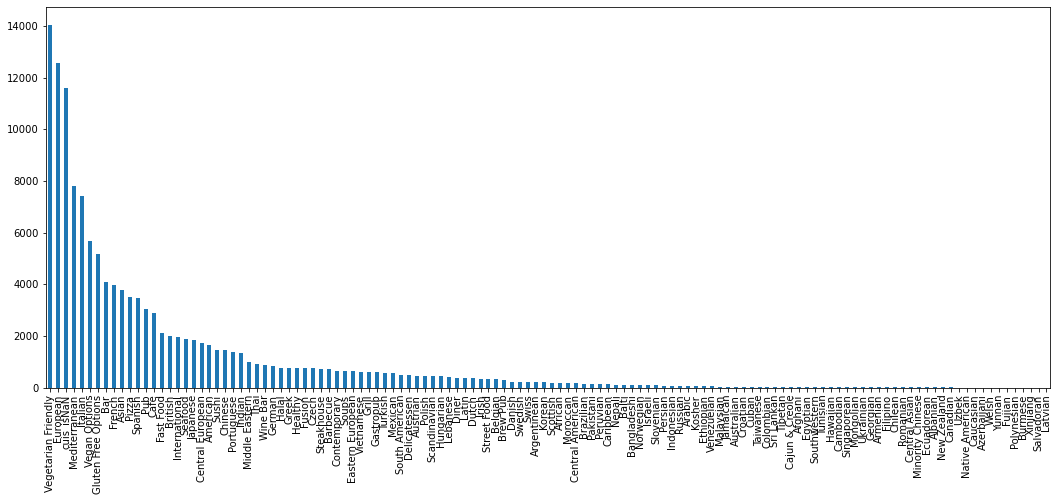

In [15]:
df['Cuisine_Style'] = df['Cuisine_Style'].fillna("['cuis_isNaN']")
le.fit(df.Cuisine_Style)
df['code_Cuisine'] = le.transform(df['Cuisine_Style'])
df['Cuisine_Style'] = df['Cuisine_Style'].str.findall(r"'(\b.*?\b)'")
df['Count_cuisine'] = df.Cuisine_Style.apply(lambda x: len(x))

# функция для списка со списками
def list_unrar(list_of_lists):
    result=[]
    for lst in list_of_lists:
        result.extend(lst)
    return result

temp_list = df.Cuisine_Style.tolist()
temp_Counter = Counter(list_unrar(temp_list))

plt.figure(figsize=(18,7))
df.explode('Cuisine_Style')['Cuisine_Style'].value_counts(ascending=False).plot(kind='bar')

In [16]:
# список самых популярных кухонь
list_of_popular = [x[0] for x in temp_Counter.most_common(15)]
print(list_of_popular, len(list_of_popular))
# список довольно редких кухонь (менее 90 упоминаний)
list_of_niche = [x[0] for x in temp_Counter.most_common()[-50:]]
print(list_of_niche, len(list_of_niche))
# список кухонь средней частоты (все остальные)
list_of_regular = [x[0] for x in temp_Counter.most_common()[15:-50]]
print(list_of_regular, len(list_of_regular))

['Vegetarian Friendly', 'European', 'cuis_isNaN', 'Mediterranean', 'Italian', 'Vegan Options', 'Gluten Free Options', 'Bar', 'French', 'Asian', 'Pizza', 'Spanish', 'Pub', 'Cafe', 'Fast Food'] 15
['Slovenian', 'Persian', 'Indonesian', 'Russian', 'Arabic', 'Kosher', 'Ethiopian', 'Venezuelan', 'Malaysian', 'Australian', 'Jamaican', 'Croatian', 'Cuban', 'Colombian', 'Sri Lankan', 'Taiwanese', 'Tibetan', 'Afghani', 'Cajun & Creole', 'Southwestern', 'Egyptian', 'Tunisian', 'Hawaiian', 'Cambodian', 'Singaporean', 'Mongolian', 'Ukrainian', 'Georgian', 'Armenian', 'Filipino', 'Chilean', 'Romanian', 'Minority Chinese', 'Central Asian', 'Ecuadorean', 'Albanian', 'Canadian', 'New Zealand', 'Native American', 'Uzbek', 'Caucasian', 'Welsh', 'Azerbaijani', 'Yunnan', 'Polynesian', 'Fujian', 'Salvadoran', 'Xinjiang', 'Burmese', 'Latvian'] 50
['British', 'International', 'Seafood', 'Japanese', 'Central European', 'American', 'Sushi', 'Chinese', 'Portuguese', 'Indian', 'Middle Eastern', 'Thai', 'Wine Bar

In [17]:
# сформируем новые признаки - редковстречающиеся и среднечасто встречающиеся кухни объединим 
# в соответсвующие категории
df['niche_Cuisine_Style'] = df['Cuisine_Style'].apply(lambda x: 1 if len(set(x) & set(list_of_niche))>0  else 0).astype('float64')

df['regular_Cuisine_Style'] = df['Cuisine_Style'].apply(lambda x: 1 if len(set(x) & set(list_of_regular))>0  else 0).astype('float64')

# а самые популярные 15 кухонь выведем в отдельные категории

for cuisine in list_of_popular:
    df[cuisine] = df['Cuisine_Style'].apply(lambda x: 1 if cuisine in x else 0 ).astype('float64')
    
df.head(3)

,Restaurant_id,City,Cuisine_Style,Ranking,Price_Range,Number_of_Reviews,Reviews,URL_TA,ID_TA,sample,Rating,count_franchise,code_City,count_rest_in_city,Population,code_Cuisine,Count_cuisine,niche_Cuisine_Style,regular_Cuisine_Style,Vegetarian Friendly,European,cuis_isNaN,Mediterranean,Italian,Vegan Options,Gluten Free Options,Bar,French,Asian,Pizza,Spanish,Pub,Cafe,Fast Food
0,id_0,Paris,"[Bar, Pub]",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,16,24,6108,2148.327,1778,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,id_1,Helsinki,"[European, Scandinavian, Gluten Free Options, ...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,10,12,475,656.611,4076,5,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,id_2,Edinburgh,[Vegetarian Friendly],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,15,9,745,488.100,10660,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 3   Ranking

Отнормируем по городам

In [18]:
mean_Ranking_on_City = df.groupby(['City'])['Ranking'].mean()
df['mean_Ranking_on_City'] = df['City'].apply(lambda x: mean_Ranking_on_City[x])
df['norm_Ranking_on_Rest_in_City'] = (df['Ranking'] - df['mean_Ranking_on_City']) / df['count_rest_in_city']

Отнормируем по населению в городе

In [19]:
df['norm_Ranking_on_Pop_in_City'] = (df['Ranking'] - df['mean_Ranking_on_City']) / df['Population']
df.describe()

,Ranking,Number_of_Reviews,sample,Rating,count_franchise,code_City,count_rest_in_city,Population,code_Cuisine,Count_cuisine,niche_Cuisine_Style,regular_Cuisine_Style,Vegetarian Friendly,European,cuis_isNaN,Mediterranean,Italian,Vegan Options,Gluten Free Options,Bar,French,Asian,Pizza,Spanish,Pub,Cafe,Fast Food,mean_Ranking_on_City,norm_Ranking_on_Rest_in_City,norm_Ranking_on_Pop_in_City
count,50000.000000,46800.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,5.000000e+04
mean,3664.427520,124.471197,0.800000,3.194430,6.809000,15.955640,3196.634400,2778.441205,6957.399340,2.625320,0.022360,0.480800,0.280420,0.251220,0.231800,0.156400,0.148660,0.113680,0.103700,0.081880,0.079400,0.075720,0.070040,0.069120,0.061160,0.057660,0.042440,3664.427520,-5.211387e-18,-2.207123e-18
std,3700.092452,294.114345,0.400004,1.705453,4.249965,8.682093,2321.787321,2690.488115,3339.719761,1.824029,0.147853,0.499636,0.449209,0.433719,0.421986,0.363238,0.355757,0.317425,0.304874,0.274185,0.270365,0.264552,0.255217,0.253661,0.239626,0.233102,0.201593,2623.722828,6.674963e-01,1.315504e+00
min,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,222.000000,185.103000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.509009,-1.209024e+00,-8.313760e+00
25%,972.000000,9.000000,1.000000,3.000000,3.000000,8.000000,1145.000000,1335.084000,4256.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1370.297817,-5.776474e-01,-6.278165e-01
50%,2278.000000,33.000000,1.000000,4.000000,6.000000,16.000000,2694.000000,1841.179000,7491.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3106.027840,-4.143651e-03,-4.447315e-03
75%,5241.000000,115.000000,1.000000,4.500000,10.000000,24.000000,6108.000000,3266.126000,10639.000000,4.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6938.557138,5.762193e-01,6.283561e-01
max,16444.000000,9660.000000,1.000000,5.000000,19.000000,30.000000,7193.000000,8961.989000,10731.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8169.707354,1.216334e+00,7.909640e+00


# 4   Price Range 

regular        23041
price_isNaN    17361
econom          7816
luxury          1782
Name: Price_Range, dtype: int64


<AxesSubplot:xlabel='Price_Range', ylabel='Rating'>

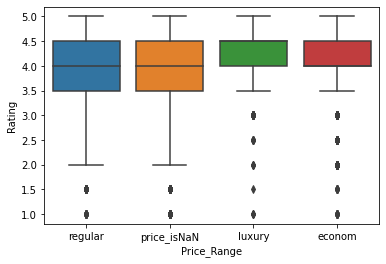

In [20]:
# заполним пропуски и выделим ценовые категории
def price_range(x):
    if x=='$':
        return 'econom'
    elif x=='$$ - $$$':
        return 'regular'
    elif x=='$$$$':
        return 'luxury'
    return "price_isNaN"

df.Price_Range = df.Price_Range.apply(price_range)
print(df.Price_Range.value_counts())
sns.boxplot(x='Price_Range', y='Rating', data=df[df['sample']==1])

In [21]:
price_list = list(set(df.Price_Range.tolist()))
for price in price_list:
    df[price] = df['Price_Range'].apply(lambda x: 1 if price in x else 0 ).astype('float64') 
    
df.head(2)

,Restaurant_id,City,Cuisine_Style,Ranking,Price_Range,Number_of_Reviews,Reviews,URL_TA,ID_TA,sample,Rating,count_franchise,code_City,count_rest_in_city,Population,code_Cuisine,Count_cuisine,niche_Cuisine_Style,regular_Cuisine_Style,Vegetarian Friendly,European,cuis_isNaN,Mediterranean,Italian,Vegan Options,Gluten Free Options,Bar,French,Asian,Pizza,Spanish,Pub,Cafe,Fast Food,mean_Ranking_on_City,norm_Ranking_on_Rest_in_City,norm_Ranking_on_Pop_in_City,price_isNaN,econom,regular,luxury
0,id_0,Paris,"[Bar, Pub]",12963.0,regular,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,16,24,6108,2148.327,1778,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6938.557138,0.986320,2.804249,0.0,0.0,1.0,0.0
1,id_1,Helsinki,"[European, Scandinavian, Gluten Free Options, ...",106.0,regular,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,10,12,475,656.611,4076,5,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,564.231579,-0.964698,-0.697874,0.0,0.0,1.0,0.0


#  5   Number_of_Reviews

<AxesSubplot:xlabel='City'>

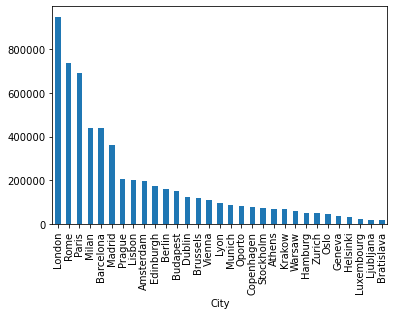

In [22]:
# сохраним пропуски
df['Number_of_Reviews_isNAN'] = pd.isna(df['Number_of_Reviews']).astype('float64')
# заполним пропуски медианным по городу значением
grp = df.groupby(['City'])
df.Number_of_Reviews = grp.Number_of_Reviews.apply(lambda x: x.fillna(x.median()))
df.groupby('City')['Number_of_Reviews'].sum().sort_values(ascending=False).plot(kind='bar')

# 6   Reviews

Выделим даты отзывов

In [23]:
df['Reviews'] = df['Reviews'].fillna("[[], []]")
# найдем все даты в отзывах
df['Dates'] = df.Reviews.str.findall(r'\d{2}/\d{2}/\d{4}')
df['Dates_num'] = df['Dates'].apply(len)
df['Dates_num'].value_counts()

2    36206
0     8114
1     5680
Name: Dates_num, dtype: int64

In [24]:
# сохраним рестораны с одним отзывом
df['one_Review'] = (df['Dates_num']==1).astype('float64')
# функция определяет насколько давно был сделан самый свежий отзыв
def time_to_now(row):
    if row['Dates'] == []:
        return None
    return datetime.datetime.now() - pd.to_datetime(row['Dates']).max()
# функция для определения перерыва между отзывами
def time_between_Reviews(row):
    if row['Dates'] == []:
        return None
    return pd.to_datetime(row['Dates']).max() - pd.to_datetime(row['Dates']).min()

df['time_to_now'] = df.apply(time_to_now, axis = 1).dt.days
print(df['time_to_now'].describe())
df['Period_rev'] = df[df['Dates_num']==2].apply(time_between_Reviews, axis = 1).dt.days
print(df['Period_rev'].describe())

count    41886.000000
mean      1605.045361
std        363.252094
min       1315.000000
25%       1394.000000
50%       1468.000000
75%       1652.000000
max       6374.000000
Name: time_to_now, dtype: float64
count    36206.000000
mean       142.548832
std        222.554361
min          0.000000
25%         20.000000
50%         67.000000
75%        173.000000
max       3296.000000
Name: Period_rev, dtype: float64


<AxesSubplot:>

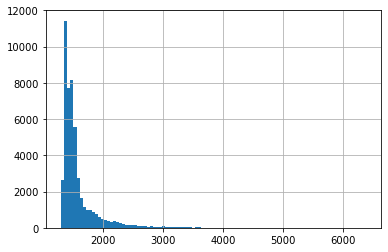

In [25]:
# заполним пропуски средним значением по городу
grp = df.groupby(['City'])
df.time_to_now = grp.time_to_now.apply(lambda x: x.fillna(x.median()))
df.Period_rev = grp.Period_rev.apply(lambda x: x.fillna(x.median()))
df['time_to_now'].hist(bins=100)

<AxesSubplot:>

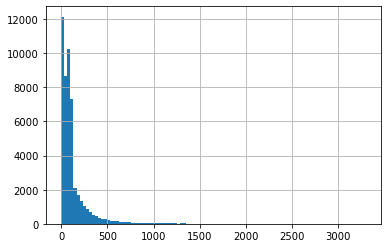

In [26]:
df['Period_rev'].hist(bins=100)

### Теперь поработаем над текстом отзывов

In [27]:
# функция выдаст список слов отзыва сокращенных до корневой формы
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))  
# функция удалит шумовые слова из текста
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result
df['no_review'] = (df['Dates_num']==0).astype('float64')
df['Text_clean'] = df['Reviews'].apply(lemmatize_stemming)
df['Text_clean'] = df['Reviews'].apply(preprocess)
df['Text_clean_len'] = df['Text_clean'].apply(len) 
print(df['Text_clean_len'].value_counts())
df['Text_clean_len'].describe()

0     8237
5     8122
4     7660
6     7182
3     5279
7     4779
2     3194
8     2781
9     1185
1     1099
10     398
11      76
12       7
13       1
Name: Text_clean_len, dtype: int64


count    50000.000000
mean         4.178900
std          2.571798
min          0.000000
25%          2.000000
50%          4.000000
75%          6.000000
max         13.000000
Name: Text_clean_len, dtype: float64

In [28]:
text_list = df['Text_clean'].tolist()
text_cnt = Counter(list_unrar(text_list))
print(len(text_cnt.most_common()))
text_cnt.most_common(10)

10991


[('food', 13200),
 ('good', 11803),
 ('great', 10634),
 ('nice', 5725),
 ('place', 5238),
 ('servic', 4451),
 ('restaur', 3733),
 ('best', 3411),
 ('excel', 3371),
 ('lunch', 2715)]

In [29]:
# выделим списки популярных слов в соответствии с оценкой
positive = ['good','great','nice','best','excel','delicio','love','delici','friendli','amaz','tasti',
            'atmospher','authent','fantast','quick''perfect','qualiti','wonder','cheap',
            'fresh','tast','surpris','cozi','reason','cosi','better','worth','famili','fast',
            'pleasant','awesom','super','like','real','beauti','relax','recommend','enjoy',
            'superb','special','yummi','welcom','cool','fabul','interest','healthi','quiet',
            'favourit','delight','high','brilliant','warm','favorit','charm','outstand','cute',
            'pricey','pretti','curri','happi','highli','ambianc','vibe','heart','comfort','incred',
            'modern','ambienc','fair','conveni','uniqu','surprisingli','clean','lover','heaven','chill',
            'sweet','fare','quirki','honest','genuin','class','true','attent','stylish','trendi','return',
            'popular','creativ','inexpens','flavor','romant','hospit','satisfi','atmosph','gorgeou','joint',
            'eleg','proper','usual','intim','treasur','gourmet','athen','truli','sure','reliabl','ideal',
            'ingredi','host','unusu','celebr','care','hearti','effici','perfectli','fanci','pleasur','smile',
            'thank','exquisit','fashion','paradis','refresh','pleasantli','jewel','lucki','freshli','fairli',
            'spectacular','innov','funki','magic','supper','unbeliev','feast','rustic','smoothi','entertain',
            'michelin','highlight','calm','ambient','posit','atmo','correct','inspir','dream','familiar','glad',
           'friendliest','greatest','nicest','wholesom','tranquil','comfi','attract','amazingli','frendli',
            'pleasent','flavoursom','yumm','excellen','atmosfer','luxuri','royal','freshest','perfecto','tremend',
            'deliciu','freindli','frindli','amateur','nicer','greater','brilliantli','coolest','respect','goood']
negative = ['disapoint','dissapoint','worst','tasteless','rat','horribl','prici','crepe','problem','wast',
            'terribl','bore','mediocr','dissapoint','rude','overpric','disappoint','lack','noisi','slow',
            'expens','poor','disgust','avoid','trap','shame','unfriendli','bewar','dirti','unpleas','unpleas',
            'underwhelm','rubbish','weird','worthi','scam','poorli','expensi','complaint','cheater','dishonest',
            'unwelcom','nope','uninterest','rough','horrend','rudest','disrespect','horrif','pour','slowest',
            'jerk','impolit']
neutral = ['averag','decent','ordinari','regular','simpl','alright','typic','okay','normal','casual','middl',
           'simpli','classi','standard']

# создадим признаки с эмоциональной окраской текста отзыва
df['positive'] = df['Text_clean'].apply(lambda x: 1 if len(set(x) & set(positive))>0  else 0).astype('float64')
df['negative'] = df['Text_clean'].apply(lambda x: 1 if len(set(x) & set(negative))>0  else 0).astype('float64')
df['neutral'] = df['Text_clean'].apply(lambda x: 1 if len(set(x) & set(neutral))>0  else 0).astype('float64')
df.describe()

,Ranking,Number_of_Reviews,sample,Rating,count_franchise,code_City,count_rest_in_city,Population,code_Cuisine,Count_cuisine,niche_Cuisine_Style,regular_Cuisine_Style,Vegetarian Friendly,European,cuis_isNaN,Mediterranean,Italian,Vegan Options,Gluten Free Options,Bar,French,Asian,Pizza,Spanish,Pub,Cafe,Fast Food,mean_Ranking_on_City,norm_Ranking_on_Rest_in_City,norm_Ranking_on_Pop_in_City,price_isNaN,econom,regular,luxury,Number_of_Reviews_isNAN,Dates_num,one_Review,time_to_now,Period_rev,no_review,Text_clean_len,positive,negative,neutral
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000
mean,3664.427520,118.563320,0.800000,3.194430,6.809000,15.955640,3196.634400,2778.441205,6957.399340,2.625320,0.022360,0.480800,0.280420,0.251220,0.231800,0.156400,0.148660,0.113680,0.103700,0.081880,0.079400,0.075720,0.070040,0.069120,0.061160,0.057660,0.042440,3664.427520,-5.211387e-18,-2.207123e-18,0.347220,0.156320,0.460820,0.035640,0.064000,1.561840,0.113600,1588.594510,126.637800,0.162280,4.178900,0.719760,0.076860,0.05882
std,3700.092452,285.475212,0.400004,1.705453,4.249965,8.682093,2321.787321,2690.488115,3339.719761,1.824029,0.147853,0.499636,0.449209,0.433719,0.421986,0.363238,0.355757,0.317425,0.304874,0.274185,0.270365,0.264552,0.255217,0.253661,0.239626,0.233102,0.201593,2623.722828,6.674963e-01,1.315504e+00,0.476091,0.363162,0.498468,0.185393,0.244755,0.755478,0.317328,334.860587,191.454878,0.368711,2.571798,0.449121,0.266372,0.23529
min,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,222.000000,185.103000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.509009,-1.209024e+00,-8.313760e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1315.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,972.000000,10.000000,1.000000,3.000000,3.000000,8.000000,1145.000000,1335.084000,4256.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1370.297817,-5.776474e-01,-6.278165e-01,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1406.000000,34.000000,0.000000,2.000000,0.000000,0.000000,0.00000
50%,2278.000000,32.000000,1.000000,4.000000,6.000000,16.000000,2694.000000,1841.179000,7491.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3106.027840,-4.143651e-03,-4.447315e-03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1487.000000,82.000000,0.000000,4.000000,1.000000,0.000000,0.00000
75%,5241.000000,106.000000,1.000000,4.500000,10.000000,24.000000,6108.000000,3266.126000,10639.000000,4.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6938.557138,5.762193e-01,6.283561e-01,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,1599.000000,122.000000,0.000000,6.000000,1.000000,0.000000,0.00000
max,16444.000000,9660.000000,1.000000,5.000000,19.000000,30.000000,7193.000000,8961.989000,10731.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8169.707354,1.216334e+00,7.909640e+00,1.0000

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 53 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Restaurant_id                 50000 non-null  object 
 1   City                          50000 non-null  object 
 2   Cuisine_Style                 50000 non-null  object 
 3   Ranking                       50000 non-null  float64
 4   Price_Range                   50000 non-null  object 
 5   Number_of_Reviews             50000 non-null  float64
 6   Reviews                       50000 non-null  object 
 7   URL_TA                        50000 non-null  object 
 8   ID_TA                         50000 non-null  object 
 9   sample                        50000 non-null  int64  
 10  Rating                        50000 non-null  float64
 11  count_franchise               50000 non-null  int64  
 12  code_City                     50000 non-null  int64  
 13  c

In [31]:
# убираем не нужные для модели признаки
df.drop(['ID_TA','URL_TA','Dates'], axis = 1, inplace=True)

In [32]:
# добавим dummy признак по  городам
df = pd.concat([df,df_dum_Cit], axis=1)
df.head(3)

,Restaurant_id,City,Cuisine_Style,Ranking,Price_Range,Number_of_Reviews,Reviews,sample,Rating,count_franchise,code_City,count_rest_in_city,Population,code_Cuisine,Count_cuisine,niche_Cuisine_Style,regular_Cuisine_Style,Vegetarian Friendly,European,cuis_isNaN,Mediterranean,Italian,Vegan Options,Gluten Free Options,Bar,French,Asian,Pizza,Spanish,Pub,Cafe,Fast Food,mean_Ranking_on_City,norm_Ranking_on_Rest_in_City,norm_Ranking_on_Pop_in_City,price_isNaN,econom,regular,luxury,Number_of_Reviews_isNAN,Dates_num,one_Review,time_to_now,Period_rev,no_review,Text_clean,Text_clean_len,positive,negative,neutral,Amsterdam,Athens,Barcelona,Berlin,Bratislava,Brussels,Budapest,Copenhagen,Dublin,Edinburgh,Geneva,Hamburg,Helsinki,Krakow,Lisbon,Ljubljana,London,Luxembourg,Lyon,Madrid,Milan,Munich,Oporto,Oslo,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich
0,id_0,Paris,"[Bar, Pub]",12963.0,regular,4.0,"[[], []]",0,0.0,16,24,6108,2148.327,1778,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6938.557138,0.986320,2.804249,0.0,0.0,1.0,0.0,0.0,0,0.0,1499.0,86.0,1.0,[],0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,id_1,Helsinki,"[European, Scandinavian, Gluten Free Options, ...",106.0,regular,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",0,0.0,10,12,475,656.611,4076,5,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,564.231579,-0.964698,-0.697874,0.0,0.0,1.0,0.0,0.0,2,0.0,1398.0,37.0,0.0,"[good, review, fine, din, hakaniemi]",5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,id_2,Edinburgh,[Vegetarian Friendly],810.0,regular,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",0,0.0,15,9,745,488.100,10660,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,885.130201,-0.100846,-0.153924,0.0,0.0,1.0,0.0,0.0,2,0.0,1375.0,22.0,0.0,"[better, link, black]",3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
object_columns = [s for s in df.columns if df[s].dtypes == 'object']
df.drop(object_columns, axis = 1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 75 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ranking                       50000 non-null  float64
 1   Number_of_Reviews             50000 non-null  float64
 2   sample                        50000 non-null  int64  
 3   Rating                        50000 non-null  float64
 4   count_franchise               50000 non-null  int64  
 5   code_City                     50000 non-null  int64  
 6   count_rest_in_city            50000 non-null  int64  
 7   Population                    50000 non-null  float64
 8   code_Cuisine                  50000 non-null  int64  
 9   Count_cuisine                 50000 non-null  int64  
 10  niche_Cuisine_Style           50000 non-null  float64
 11  regular_Cuisine_Style         50000 non-null  float64
 12  Vegetarian Friendly           50000 non-null  float64
 13  E

# Стандартизация

Я пока не очень разобралась, как обрабатывать выбросы, поэтому воспользуюсь библиотекой для стандартизации RobustScaler, который не чувствителен к выбросам

In [34]:
# функция для стандартизации
def RobustScaler_column(d_col):
    scaler = RobustScaler()
    scaler.fit(df[[d_col]])
    return scaler.transform(df[[d_col]])
# стандартизируем все столбцы кроме целевой и Sample
for i  in list(df.columns):
    if i not in ['Rating','sample']:
        df[i] = RobustScaler_column(i)

df.describe()

,Ranking,Number_of_Reviews,sample,Rating,count_franchise,code_City,count_rest_in_city,Population,code_Cuisine,Count_cuisine,niche_Cuisine_Style,regular_Cuisine_Style,Vegetarian Friendly,European,cuis_isNaN,Mediterranean,Italian,Vegan Options,Gluten Free Options,Bar,French,Asian,Pizza,Spanish,Pub,Cafe,Fast Food,mean_Ranking_on_City,norm_Ranking_on_Rest_in_City,norm_Ranking_on_Pop_in_City,price_isNaN,econom,regular,luxury,Number_of_Reviews_isNAN,Dates_num,one_Review,time_to_now,Period_rev,no_review,Text_clean_len,positive,negative,neutral,Amsterdam,Athens,Barcelona,Berlin,Bratislava,Brussels,Budapest,Copenhagen,Dublin,Edinburgh,Geneva,Hamburg,Helsinki,Krakow,Lisbon,Ljubljana,London,Luxembourg,Lyon,Madrid,Milan,Munich,Oporto,Oslo,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.324766,0.901701,0.800000,3.194430,0.115571,-0.002772,0.101276,0.485366,-0.083597,0.208440,0.022360,0.480800,0.280420,0.251220,0.231800,0.156400,0.148660,0.113680,0.103700,0.081880,0.079400,0.075720,0.070040,0.069120,0.061160,0.057660,0.042440,0.100283,3.591100e-03,3.540369e-03,0.347220,0.156320,0.460820,0.035640,0.064000,-0.438160,0.113600,0.526396,0.507248,0.162280,0.044725,-0.280240,0.076860,0.05882,0.027440,0.01552,0.067900,0.054100,0.007600,0.026280,0.020420,0.016380,0.016720,0.014900,0.011800,0.023720,0.009500,0.011080,0.032940,0.004440,0.143860,0.005260,0.022520,0.076260,0.053880,0.022900,0.012840,0.00976,0.122160,0.036320,0.051780,0.020660,0.028860,0.018500,0.013700
std,0.866735,2.973700,0.400004,1.705453,0.607138,0.542631,0.467819,1.393283,0.523221,0.608010,0.147853,0.499636,0.449209,0.433719,0.421986,0.363238,0.355757,0.317425,0.304874,0.274185,0.270365,0.264552,0.255217,0.253661,0.239626,0.233102,0.201593,0.471193,5.784865e-01,1.047231e+00,0.476091,0.363162,0.498468,0.185393,0.244755,0.755478,0.317328,1.735029,2.175624,0.368711,0.642950,0.449121,0.266372,0.23529,0.163363,0.12361,0.251577,0.226217,0.086847,0.159968,0.141433,0.126933,0.128222,0.121154,0.107986,0.152177,0.097005,0.104678,0.178481,0.066486,0.350951,0.072336,0.148369,0.265416,0.225783,0.149586,0.112585,0.09831,0.327474,0.187087,0.221585,0.142245,0.167415,0.134752,0.116244
min,-0.533380,-0.312500,0.000000,0.000000,-0.714286,-1.000000,-0.498086,-0.857607,-1.173586,-0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.515694,-1.044211e+00,-6.614785e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,-0.891192,-0.931818,0.000000,-1.000000,-1.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.305926,-0.229167,1.000000,3.000000,-0.428571,-0.500000,-0.312110,-0.262084,-0.506815,-0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

/home/dafe/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:643: UserWarning:

Using the boxplot function without specifying `order` is likely to produce an incorrect plot.



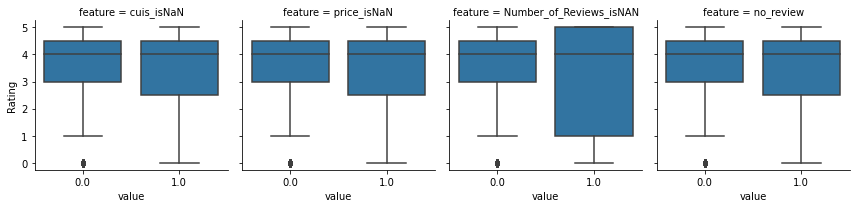

In [35]:
sns.FacetGrid(df[['cuis_isNaN',
                     'price_isNaN',
                     'Number_of_Reviews_isNAN',
                     'no_review',
                     'Rating']].melt(
                         id_vars=["Rating"],
                         var_name="feature",
                         value_name="value"), col="feature").map(sns.boxplot, "value", "Rating")

/home/dafe/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:643: UserWarning:

Using the boxplot function without specifying `order` is likely to produce an incorrect plot.



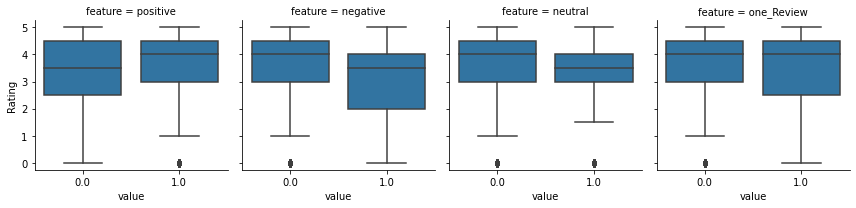

In [36]:
sns.FacetGrid(df[['positive',
                     'negative',
                     'neutral',
                     'one_Review',
                     'Rating']].melt(
                         id_vars=["Rating"],
                         var_name="feature",
                         value_name="value"), col="feature").map(sns.boxplot, "value", "Rating")

/home/dafe/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:643: UserWarning:

Using the boxplot function without specifying `order` is likely to produce an incorrect plot.



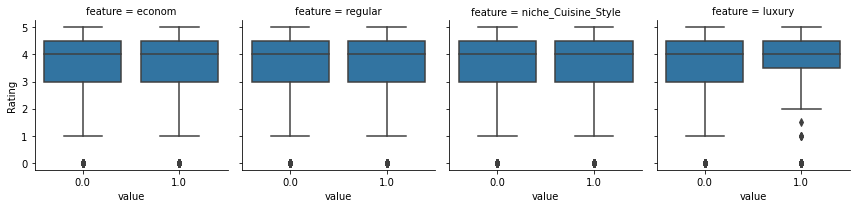

In [37]:
sns.FacetGrid(df[['econom',
                     'regular',
                     'niche_Cuisine_Style',
                     'luxury',
                     'Rating']].melt(
                         id_vars=["Rating"],
                         var_name="feature",
                         value_name="value"), col="feature").map(sns.boxplot, "value", "Rating")

### Посмотрим распределение признака

<AxesSubplot:>

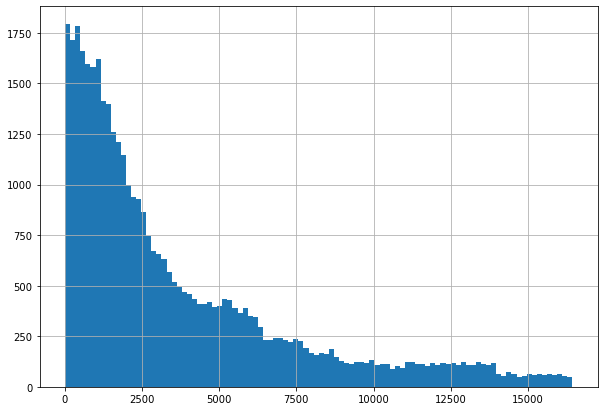

In [38]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

<AxesSubplot:>

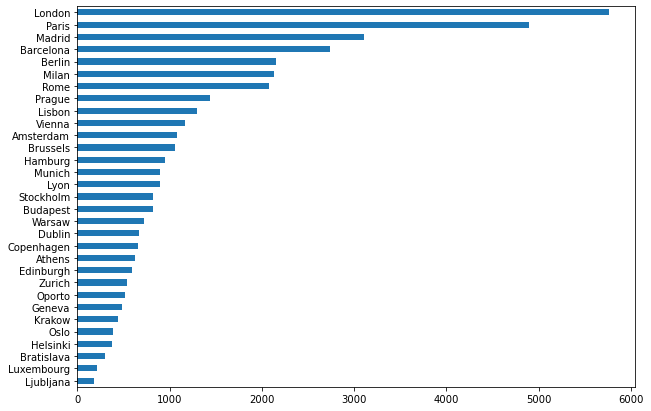

In [39]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

<AxesSubplot:>

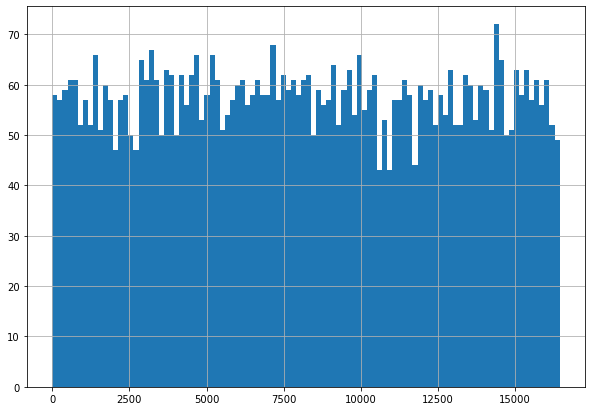

In [40]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

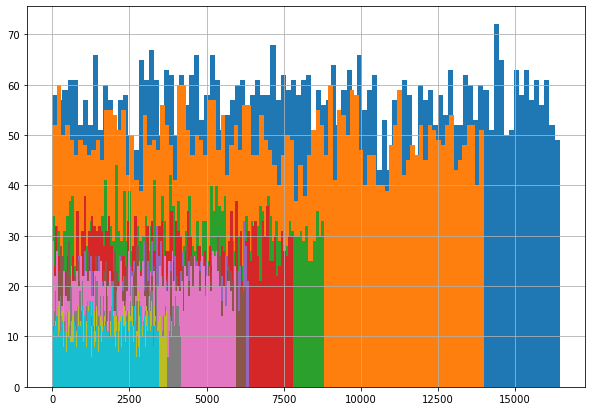

In [41]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

>Подумайте как из этого можно сделать признак для вашей модели. Я покажу вам пример, как визуализация помогает находить взаимосвязи. А далее действуйте без подсказок =) 


### Посмотрим распределение целевой переменной

<AxesSubplot:>

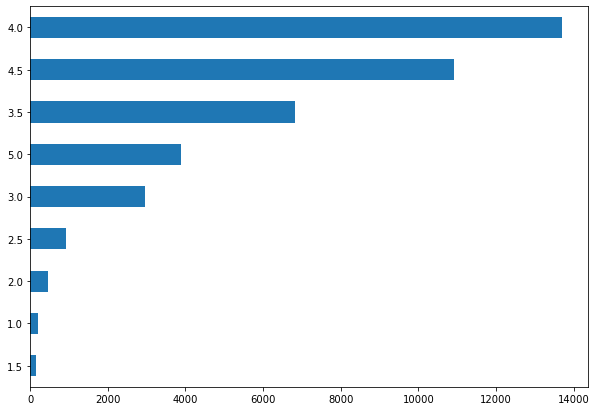

In [42]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

<AxesSubplot:>

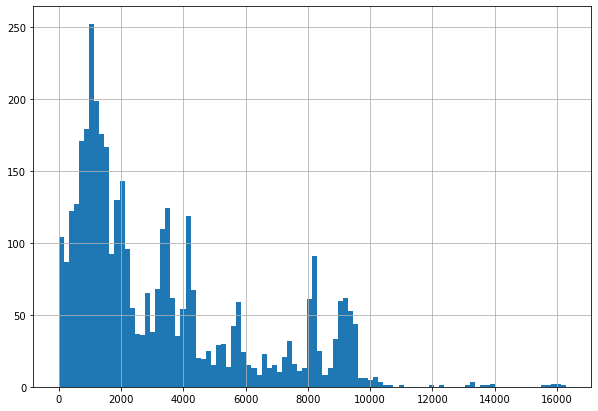

In [43]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

<AxesSubplot:>

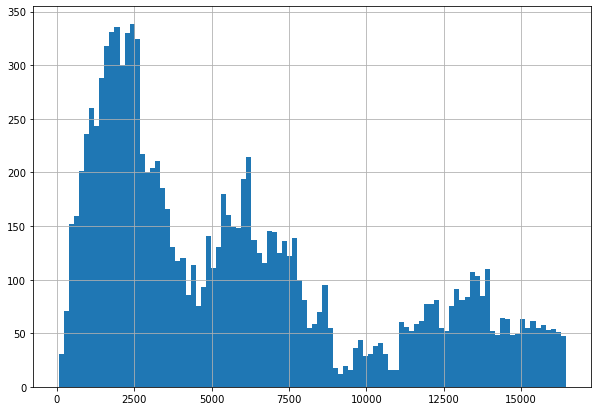

In [44]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

In [68]:
corrs = df.corr()
corrs.columns
figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
figure.update_layout(
    autosize=False,
    width=2500,
    height=1500,)

figure.show()

Вообще благодаря визуализации в этом датасете можно узнать много интересных фактов, например:
* где больше Пицерий в Мадриде или Лондоне?
* в каком городе кухня ресторанов более разнообразна?

придумайте свои вопрос и найдите на него ответ в данных)

# Подбор параметров для модели

In [48]:
'''# # блок тестирования оптимального набора
list_ofAllColumnsSortImportant = list(feat_importances.nlargest(len(train_data.columns)-1).index)
MAE = 0.1724375
min_MAE = round(MAE,3)
print(f"min_MAE = {min_MAE}")
remove_list = []
log = []
delta =0.002

for i in range(0,len(list_ofAllColumnsSortImportant),1):
    col = list_ofAllColumnsSortImportant[i]
    print(f"{i}.{col}")
    ###

    X = train_data.drop(['Rating']+[col], axis=1)
    y = train_data['Rating']

    # Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
    # выделим 20% данных на валидацию (параметр test_size)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)
    print(df.shape, y.shape, X.shape, X_train.shape, X_test.shape)
    
    model_ = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)
    model_.fit(X_train, y_train)

    y_pred = model_.predict(X_test)
    for i in range(y_pred.size):
        y_pred[i]=rating(y_pred[i])
        
    temp_MAE = metrics.mean_absolute_error(y_test, y_pred)
     ###
    print(temp_MAE)
    log.append([col, temp_MAE])
    if round(temp_MAE,3) <= min_MAE-delta:
        remove_list.append(col)
        print(f"удаляем:= {col}")
    else:
        print(f"не удаляем:= {col}")
print(f"i={i}")
print(f"remove_list: {remove_list}")
print(f"log_list: {log}")'''

'# # блок тестирования оптимального набора\nlist_ofAllColumnsSortImportant = list(feat_importances.nlargest(len(train_data.columns)-1).index)\nMAE = 0.1724375\nmin_MAE = round(MAE,3)\nprint(f"min_MAE = {min_MAE}")\nremove_list = []\nlog = []\ndelta =0.002\n\nfor i in range(0,len(list_ofAllColumnsSortImportant),1):\n    col = list_ofAllColumnsSortImportant[i]\n    print(f"{i}.{col}")\n    ###\n\n    X = train_data.drop([\'Rating\']+[col], axis=1)\n    y = train_data[\'Rating\']\n\n    # Воспользуемся специальной функцие train_test_split для разбивки тестовых данных\n    # выделим 20% данных на валидацию (параметр test_size)\n    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)\n    print(df.shape, y.shape, X.shape, X_train.shape, X_test.shape)\n    \n    model_ = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)\n    model_.fit(X_train, y_train)\n\n    y_pred = model_.predict(X_test)\n    for i in ra

### Блок подбора параметров задокументирован, чтобы не запускать снова долгие расчеты, результат сохранен в log_list

In [49]:
log_list = [['norm_Ranking_on_Rest_in_City', 0.172875], ['Number_of_Reviews', 0.2376875], 
            ['Rome', 0.17325], ['norm_Ranking_on_Pop_in_City', 0.17325], 
            ['Number_of_Reviews_isNAN', 0.173875], ['Ranking', 0.1729375], 
            ['time_to_now', 0.1773125], ['Period_rev', 0.1751875], ['code_Cuisine', 0.1716875], 
            ['code_City', 0.1735625], ['count_franchise', 0.1724375], ['Count_cuisine', 0.1731875], 
            ['Text_clean_len', 0.173375], ['Madrid', 0.173125], ['Population', 0.171875], 
            ['mean_Ranking_on_City', 0.173125], ['count_rest_in_city', 0.173125], 
            ['negative', 0.172375], ['regular_Cuisine_Style', 0.1725625], ['positive', 0.171], 
            ['regular', 0.1728125], ['Edinburgh', 0.17325], ['price_isNaN', 0.1736875], 
            ['econom', 0.1734375], ['Dates_num', 0.1733125], ['Mediterranean', 0.1729375], 
            ['Spanish', 0.17175], ['Italian', 0.1723125], ['European', 0.174], ['one_Review', 0.1721875], 
            ['Vegetarian Friendly', 0.1728125], ['French', 0.1726875], ['Pizza', 0.172875], 
            ['Cafe', 0.173625], ['Hamburg', 0.1726875], ['neutral', 0.1733125], ['Stockholm', 0.1733125], 
            ['Amsterdam', 0.172625], ['Asian', 0.1731875], ['niche_Cuisine_Style', 0.17325], 
            ['Oporto', 0.1719375], ['Vegan Options', 0.1733125], ['cuis_isNaN', 0.173625], 
            ['Fast Food', 0.1716875], ['Berlin', 0.1725], ['Pub', 0.17275], ['Bar', 0.1719375], 
            ['luxury', 0.172], ['Bratislava', 0.1723125], ['Milan', 0.1720625], ['Munich', 0.172375], 
            ['Prague', 0.172875], ['Dublin', 0.1733125], ['no_review', 0.1729375], 
            ['Gluten Free Options', 0.173625], ['Krakow', 0.172625], ['Budapest', 0.1749375], 
            ['Barcelona', 0.171875], ['Athens', 0.1718125], ['Vienna', 0.173], ['Paris', 0.173], 
            ['Warsaw', 0.1738125], ['Lisbon', 0.1726875], ['Lyon', 0.1725625], ['Copenhagen', 0.17375], 
            ['Helsinki', 0.173], ['Geneva', 0.1735625], ['Brussels', 0.1725], ['London', 0.1730625], 
            ['Oslo', 0.172375], ['Zurich', 0.17275], ['Luxembourg', 0.174], ['Ljubljana', 0.1725]]

### Лишних признаков не было выявлено

# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [50]:
def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    df_output = df_input.copy()
    df_output.columns = [column.replace(' ','_') for column in df_output.columns]
    ##### Обработка признаков
    
    ###  Restaurant_id
    count_franchise = df_output['Restaurant_id'].value_counts()
    df_output['count_franchise'] = df_output['Restaurant_id'].apply(lambda x: count_franchise[x])
    
    ###  City
    le = LabelEncoder()
    le.fit(df_output['City'])
    df_output['code_City'] = le.transform(df_output['City'])

    count_rest_in_city = df_output['City'].value_counts()
    df_output['count_rest_in_city'] = df_output['City'].apply(lambda x: count_rest_in_city[x])
    
    city_dict = {'Paris': 2148.327, 'Helsinki':656.611, 'Edinburgh':488.1, 'London':8961.989, 'Bratislava':437.725, 
             'Lisbon':505.526,'Budapest':1752.286, 'Stockholm':961.609, 'Rome':2870.500, 'Milan':1378.689, 
             'Munich':1471.508,'Hamburg':1841.179,'Prague':1335.084, 'Vienna':1897.491, 'Dublin':1173.179, 
             'Barcelona':1664.182, 'Brussels':185.103,'Madrid':3266.126,'Oslo':673.469, 'Amsterdam':872.757, 
             'Berlin':3644.826, 'Lyon': 506.615, 'Athens':664.046, 'Warsaw':1789.620,
             'Oporto':231.962, 'Krakow':769.307, 'Copenhagen':1358.608, 'Luxembourg':636.739, 
             'Zurich':1407.572, 'Geneva':620.131,'Ljubljana':284.355}

    df_output['Population'] = df_output.apply(lambda row: city_dict[row['City']], axis=1)
    df_dum_Cit = pd.get_dummies(df_output['City'], dummy_na=False).astype('float64')
    df_output = pd.concat([df_output,df_dum_Cit], axis=1)
    
    ###  Cuisine_Style
    le.fit(df_output.Cuisine_Style)
    df_output['code_Cuisine'] = le.transform(df_output.Cuisine_Style)
    
    df_output['Cuisine_Style'] = df_output.Cuisine_Style.fillna("['cuis_isNaN']")
    df_output['Cuisine_Style'] = df_output.Cuisine_Style.str.findall(r"'(\b.*?\b)'")
    df_output['Count_cuisine'] = df_output.Cuisine_Style.apply(lambda x: len(x))

    def list_unrar(list_of_lists):
        result=[]
        for lst in list_of_lists:
            result.extend(lst)
        return result

    temp_list = df_output.Cuisine_Style.tolist()
    temp_Counter = Counter(list_unrar(temp_list))
    # список самых популярных кухонь
    list_of_popular = [x[0] for x in temp_Counter.most_common(15)]
    # список довольно редких кухонь (менее 90 упоминаний)
    list_of_niche = [x[0] for x in temp_Counter.most_common()[-50:]]
    # список кухонь средней частоты (все остальные)
    list_of_regular = [x[0] for x in temp_Counter.most_common()[15:-50]]
    df_output['niche_Cuisine_Style'] = df_output.Cuisine_Style.apply(lambda x: 1 if len(set(x) & set(list_of_niche))>0  else 0).astype('float64')
    df_output['regular_Cuisine_Style'] = df_output.Cuisine_Style.apply(lambda x: 1 if len(set(x) & set(list_of_regular))>0  else 0).astype('float64')
    # а самые популярные 15 кухонь выведем в отдельные категории
    for cuisine in list_of_popular:
        df_output[cuisine] = df_output.Cuisine_Style.apply(lambda x: 1 if cuisine in x else 0 ).astype('float64')
        
    ###  Ranking
    mean_Ranking_on_City = df_output.groupby(['City'])['Ranking'].mean()
    df_output['mean_Ranking_on_City'] = df_output.City.apply(lambda x: mean_Ranking_on_City[x])
    df_output['norm_Ranking_on_Rest_in_City'] = (df_output.Ranking - df_output.mean_Ranking_on_City) / df_output.count_rest_in_city
    df_output['norm_Ranking_on_Pop_in_City'] = (df_output.Ranking - df_output.mean_Ranking_on_City) / df_output.Population
    
    ###  Price_Range
    # заполним пропуски и выделим ценовые категории
    def price_range(x):
        if x=='$':
            return 'econom'
        elif x=='$$ - $$$':
            return 'regular'
        elif x=='$$$$':
            return 'luxury'
        return "price_isNaN"

    df_output.Price_Range = df_output.Price_Range.apply(price_range)
    price_list = list(set(df_output.Price_Range.tolist()))
    for price in price_list:
        df_output[price] = df_output.Price_Range.apply(lambda x: 1 if price in x else 0 ).astype('float64') 
        
    ###  Number_of_Reviews
    df_output['Number_of_Reviews_isNAN'] = pd.isna(df_output['Number_of_Reviews']).astype('float64')
    # заполним пропуски медианным по городу значением
    grp = df_output.groupby(['City'])
    df_output.Number_of_Reviews = grp.Number_of_Reviews.apply(lambda x: x.fillna(x.median()))
    
    ###  Reviews
    df_output['Reviews'] = df_output['Reviews'].fillna("[[], []]")
    # Обработаем даты
    df_output['Dates'] = df_output.Reviews.str.findall(r'\d{2}/\d{2}/\d{4}')
    df_output['Dates_num'] = df_output['Dates'].apply(len)
    # сохраним рестораны с одним отзывом
    df_output['one_Review'] = (df_output['Dates_num']==1).astype('float64')
    # функция определяет насколько давно был сделан самый свежий отзыв
    def time_to_now(row):
        if row['Dates'] == []:
            return None
        return datetime.datetime.now() - pd.to_datetime(row['Dates']).max()
    # функция для определения перерыва между отзывами
    def time_between_Reviews(row):
        if row['Dates'] == []:
            return None
        return pd.to_datetime(row['Dates']).max() - pd.to_datetime(row['Dates']).min()

    df_output['time_to_now'] = df_output.apply(time_to_now, axis = 1).dt.days
    df_output['Period_rev'] = df_output[df_output['Dates_num']==2].apply(time_between_Reviews, axis = 1).dt.days
    grp = df_output.groupby(['City'])
    df_output.time_to_now = grp.time_to_now.apply(lambda x: x.fillna(x.median()))
    df_output.Period_rev = grp.Period_rev.apply(lambda x: x.fillna(x.median()))
    # обработка текста
    # функция выдаст список слов отзыва сокращенных до корневой формы
    def lemmatize_stemming(text):
        return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))  
    # функция удалит шумовые слова из текста
    def preprocess(text):
        result=[]
        for token in gensim.utils.simple_preprocess(text) :
            if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
                result.append(lemmatize_stemming(token))
        return result
    df_output['no_review'] = (df_output['Dates_num']==0).astype('float64')
    df_output['Text_clean'] = df_output['Reviews'].apply(lemmatize_stemming)
    df_output['Text_clean'] = df_output['Reviews'].apply(preprocess)
    df_output['Text_clean_len'] = df_output['Text_clean'].apply(len) 
    
    # выделим списки популярных слов в соответствии с оценкой
    positive = ['good','great','nice','best','excel','delicio','love','delici','friendli','amaz','tasti',
                'atmospher','authent','fantast','quick''perfect','qualiti','wonder','cheap',
                'fresh','tast','surpris','cozi','reason','cosi','better','worth','famili','fast',
                'pleasant','awesom','super','like','real','beauti','relax','recommend','enjoy',
                'superb','special','yummi','welcom','cool','fabul','interest','healthi','quiet',
                'favourit','delight','high','brilliant','warm','favorit','charm','outstand','cute',
                'pricey','pretti','curri','happi','highli','ambianc','vibe','heart','comfort','incred',
                'modern','ambienc','fair','conveni','uniqu','surprisingli','clean','lover','heaven','chill',
                'sweet','fare','quirki','honest','genuin','class','true','attent','stylish','trendi','return',
                'popular','creativ','inexpens','flavor','romant','hospit','satisfi','atmosph','gorgeou','joint',
                'eleg','proper','usual','intim','treasur','gourmet','athen','truli','sure','reliabl','ideal',
                'ingredi','host','unusu','celebr','care','hearti','effici','perfectli','fanci','pleasur','smile',
                'thank','exquisit','fashion','paradis','refresh','pleasantli','jewel','lucki','freshli','fairli',
                'spectacular','innov','funki','magic','supper','unbeliev','feast','rustic','smoothi','entertain',
                'michelin','highlight','calm','ambient','posit','atmo','correct','inspir','dream','familiar','glad',
               'friendliest','greatest','nicest','wholesom','tranquil','comfi','attract','amazingli','frendli',
                'pleasent','flavoursom','yumm','excellen','atmosfer','luxuri','royal','freshest','perfecto','tremend',
                'deliciu','freindli','frindli','amateur','nicer','greater','brilliantli','coolest','respect','goood']
    negative = ['disapoint','dissapoint','worst','tasteless','rat','horribl','prici','crepe','problem','wast',
                'terribl','bore','mediocr','dissapoint','rude','overpric','disappoint','lack','noisi','slow',
                'expens','poor','disgust','avoid','trap','shame','unfriendli','bewar','dirti','unpleas','unpleas',
                'underwhelm','rubbish','weird','worthi','scam','poorli','expensi','complaint','cheater','dishonest',
                'unwelcom','nope','uninterest','rough','horrend','rudest','disrespect','horrif','pour','slowest',
                'jerk','impolit']
    neutral = ['averag','decent','ordinari','regular','simpl','alright','typic','okay','normal','casual','middl',
               'simpli','classi','standard']

    # создадим признаки с эмоциональной окраской текста отзыва
    df_output['positive'] = df_output['Text_clean'].apply(lambda x: 1 if len(set(x) & set(positive))>0  else 0).astype('float64')
    df_output['negative'] = df_output['Text_clean'].apply(lambda x: 1 if len(set(x) & set(negative))>0  else 0).astype('float64')
    df_output['neutral'] = df_output['Text_clean'].apply(lambda x: 1 if len(set(x) & set(neutral))>0  else 0).astype('float64')

    # убираем не нужные для модели признаки
    df_output.drop(['ID_TA','URL_TA','Dates', 'Restaurant_id'], axis = 1, inplace=True)
    # удалим все нечисловые колонки
    object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output.drop(object_columns, axis = 1, inplace=True)
    
    ###  Стандартизация
    # функция для стандартизации
    def RobustScaler_column(d_col):
        scaler = RobustScaler()
        scaler.fit(df_output[[d_col]])
        return scaler.transform(df_output[[d_col]])
    # стандартизируем все столбцы кроме целевой и Sample
    for i  in list(df_output.columns):
        if i not in ['Rating','sample']:
            df_output[i] = RobustScaler_column(i)
            
    return df_output

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine_Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price_Range        32639 non-null  object 
 5   Number_of_Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


#### Запускаем и проверяем что получилось

In [52]:
df_preproc = preproc_data(data)
df_preproc.head(10)

,Ranking,Number_of_Reviews,sample,Rating,count_franchise,code_City,count_rest_in_city,Population,Amsterdam,Athens,Barcelona,Berlin,Bratislava,Brussels,Budapest,Copenhagen,Dublin,Edinburgh,Geneva,Hamburg,Helsinki,Krakow,Lisbon,Ljubljana,London,Luxembourg,Lyon,Madrid,Milan,Munich,Oporto,Oslo,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich,code_Cuisine,Count_cuisine,niche_Cuisine_Style,regular_Cuisine_Style,Vegetarian Friendly,European,cuis_isNaN,Mediterranean,Italian,Vegan Options,Gluten Free Options,Bar,French,Asian,Pizza,Spanish,Pub,Cafe,Fast Food,mean_Ranking_on_City,norm_Ranking_on_Rest_in_City,norm_Ranking_on_Pop_in_City,price_isNaN,econom,regular,luxury,Number_of_Reviews_isNAN,Dates_num,one_Review,time_to_now,Period_rev,no_review,Text_clean_len,positive,negative,neutral
0,2.502928,-0.291667,0,0.0,1.428571,0.5000,0.687890,0.159058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.895034,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.688281,0.858387,2.235916,0.0,0.0,1.0,0.0,0.0,-2.0,0.0,0.062176,0.045455,1.0,-1.00,-1.0,0.0,0.0
1,-0.508784,0.677083,0,0.0,0.571429,-0.2500,-0.447109,-0.613435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.535015,1.000000,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.456480,-0.832466,-0.552015,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.461140,-0.511364,0.0,0.25,0.0,0.0,0.0
2,-0.343874,-0.041667,0,0.0,1.285714,-0.4375,-0.392706,-0.700699,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.496475,-0.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.398850,-0.083807,-0.118994,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.580311,-0.681818,0.0,-0.25,0.0,0.0,0.0
3,-0.142656,1.770833,0,0.0,0.428571,0.0000,0.906508,3.687548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.059690,1.000000,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.909383,-0.779649,-0.573900,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.466321,-0.772727,0.0,-0.25,0.0,0.0,0.0
4,-0.524947,1.354167,0,0.0,1.142857,-0.7500,-0.466250,-0.726786,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.062196,1.333333,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.474762,-0.966668,-0.770166,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.797927,-0.761364,0.0,0.00,0.0,0.0,0.0
5,0.659405,-0.083333,0,0.0,0.857143,0.5000,0.687890,0.159058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.426132,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.688281,-0.258271,-0.680336,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,-0.875000,0.0,0.25,0.0,0.0,0.0
6,0.334036,-0.312500,0,0.0,0.428571,-0.1250,-0.210961,-0.691675,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.541752,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.222457,0.970047,2.895806,0.0,1.0,0.0,0.0,0.0,-2.0,0.0,-0.264249,-0.170455,1.0,-1.00,-1.0,0.0,0.0
7,0.012181,-0.083333,0,0.0,0.857143,-0.6250,-0.337094,-0.046034,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.507598,-0.333333,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.338879,0.946584,0.508243,1.0,0.0,0.0,0.0,1.0,-2.0,0.0,-0.194301,-0.386364,1.0,-1.00,-1.0,0.0,0.0
8,-0.353010,-0.312500,0,0.0,1.142857,-0.2500,-0.447109,-0.613435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.530942,0.000000,0.0,1.0,0.0,1.0,0.0,0.0

In [53]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 75 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ranking                       50000 non-null  float64
 1   Number_of_Reviews             50000 non-null  float64
 2   sample                        50000 non-null  int64  
 3   Rating                        50000 non-null  float64
 4   count_franchise               50000 non-null  float64
 5   code_City                     50000 non-null  float64
 6   count_rest_in_city            50000 non-null  float64
 7   Population                    50000 non-null  float64
 8   Amsterdam                     50000 non-null  float64
 9   Athens                        50000 non-null  float64
 10  Barcelona                     50000 non-null  float64
 11  Berlin                        50000 non-null  float64
 12  Bratislava                    50000 non-null  float64
 13  B

In [54]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [55]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [56]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 74), (40000, 74), (40000, 73), (32000, 73), (8000, 73))

# Model 
Сам ML

In [57]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [58]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [59]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

def rating(prediction):
        if prediction < 0.25:
            return 0
        elif 0.25 < prediction <= 0.75:
            return 0.5
        elif 0.75 < prediction <= 1.25:
            return 1
        elif 1.25 <prediction <= 1.75:
            return 1.5
        elif 1.75 < prediction <= 2.25:
            return 2
        elif 2.25 < prediction <= 2.75:
            return 2.5
        elif 2.75 < prediction <= 3.25:
            return 3
        elif 3.25 < prediction <= 3.75:
            return 3.5
        elif 3.75 < prediction <= 4.25:
            return 4
        elif 4.25 < prediction <= 4.75:
            return 4.5
        else:
            return 5
        
for i in range(y_pred.size):
        y_pred[i]=rating(y_pred[i])

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   28.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


In [60]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.1730625


<AxesSubplot:>

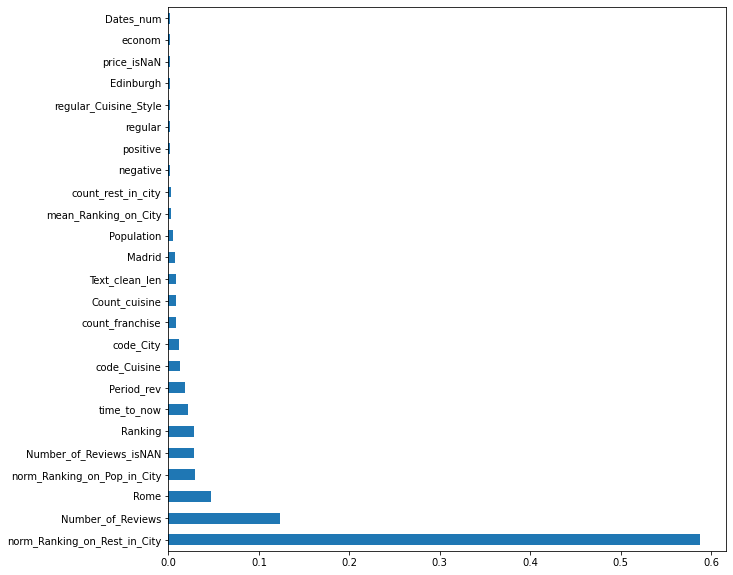

In [61]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [62]:
test_data.head(10)

,Ranking,Number_of_Reviews,Rating,count_franchise,code_City,count_rest_in_city,Population,Amsterdam,Athens,Barcelona,Berlin,Bratislava,Brussels,Budapest,Copenhagen,Dublin,Edinburgh,Geneva,Hamburg,Helsinki,Krakow,Lisbon,Ljubljana,London,Luxembourg,Lyon,Madrid,Milan,Munich,Oporto,Oslo,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich,code_Cuisine,Count_cuisine,niche_Cuisine_Style,regular_Cuisine_Style,Vegetarian Friendly,European,cuis_isNaN,Mediterranean,Italian,Vegan Options,Gluten Free Options,Bar,French,Asian,Pizza,Spanish,Pub,Cafe,Fast Food,mean_Ranking_on_City,norm_Ranking_on_Rest_in_City,norm_Ranking_on_Pop_in_City,price_isNaN,econom,regular,luxury,Number_of_Reviews_isNAN,Dates_num,one_Review,time_to_now,Period_rev,no_review,Text_clean_len,positive,negative,neutral
0,2.502928,-0.291667,0.0,1.428571,0.5000,0.687890,0.159058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.895034,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.688281,0.858387,2.235916,0.0,0.0,1.0,0.0,0.0,-2.0,0.0,0.062176,0.045455,1.0,-1.00,-1.0,0.0,0.0
1,-0.508784,0.677083,0.0,0.571429,-0.2500,-0.447109,-0.613435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.535015,1.000000,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.456480,-0.832466,-0.552015,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.461140,-0.511364,0.0,0.25,0.0,0.0,0.0
2,-0.343874,-0.041667,0.0,1.285714,-0.4375,-0.392706,-0.700699,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.496475,-0.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.398850,-0.083807,-0.118994,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.580311,-0.681818,0.0,-0.25,0.0,0.0,0.0
3,-0.142656,1.770833,0.0,0.428571,0.0000,0.906508,3.687548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.059690,1.000000,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.909383,-0.779649,-0.573900,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.466321,-0.772727,0.0,-0.25,0.0,0.0,0.0
4,-0.524947,1.354167,0.0,1.142857,-0.7500,-0.466250,-0.726786,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.062196,1.333333,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.474762,-0.966668,-0.770166,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.797927,-0.761364,0.0,0.00,0.0,0.0,0.0
5,0.659405,-0.083333,0.0,0.857143,0.5000,0.687890,0.159058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.426132,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.688281,-0.258271,-0.680336,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,-0.875000,0.0,0.25,0.0,0.0,0.0
6,0.334036,-0.312500,0.0,0.428571,-0.1250,-0.210961,-0.691675,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.541752,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.222457,0.970047,2.895806,0.0,1.0,0.0,0.0,0.0,-2.0,0.0,-0.264249,-0.170455,1.0,-1.00,-1.0,0.0,0.0
7,0.012181,-0.083333,0.0,0.857143,-0.6250,-0.337094,-0.046034,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.507598,-0.333333,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.338879,0.946584,0.508243,1.0,0.0,0.0,0.0,1.0,-2.0,0.0,-0.194301,-0.386364,1.0,-1.00,-1.0,0.0,0.0
8,-0.353010,-0.312500,0.0,1.142857,-0.2500,-0.447109,-0.613435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.530942,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [63]:
test_data = test_data.drop(['Rating'], axis=1)

In [64]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [65]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished


In [66]:
for i in range(predict_submission.size):
        predict_submission[i]=rating(predict_submission[i])
predict_submission

array([3. , 4. , 4.5, ..., 3. , 4. , 4.5])

In [67]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.0
1,id_1,4.0
2,id_2,4.5
3,id_3,4.5
4,id_4,4.5
5,id_5,4.5
6,id_6,1.5
7,id_7,3.0
8,id_8,4.0
9,id_9,4.5


# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!
